In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


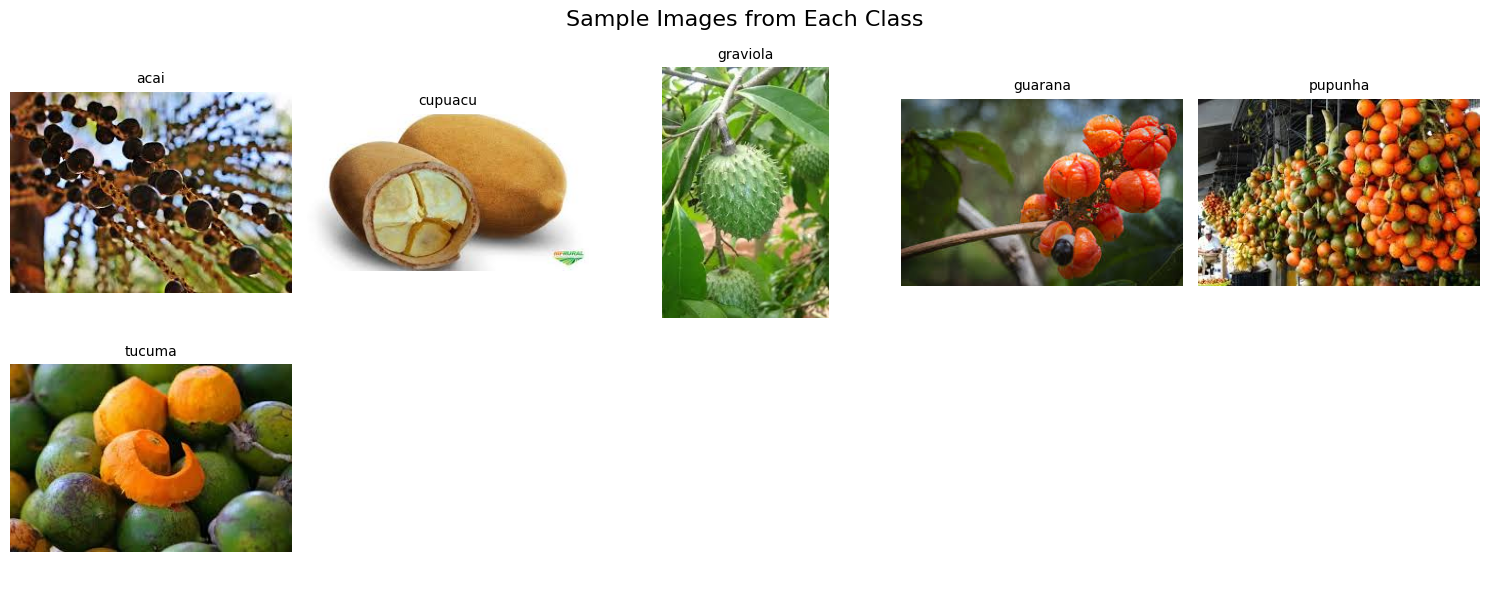

In [2]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define dataset path
train_dir = "/content/drive/MyDrive/AI and ML/week 5/FruitinAmazon/train"  # Update path

# Get the class names (subdirectories)
class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

# Check if dataset is empty
if not class_names:
    raise ValueError("No class directories found in the train folder. Check dataset path!")

# Select one random image from each class
selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('png', 'jpg', 'jpeg'))]

    if image_files:
        random_image = random.choice(image_files)
        selected_images.append(os.path.join(class_path, random_image))
        selected_labels.append(class_name)

# Ensure images were selected
num_classes = len(selected_images)
if num_classes == 0:
    raise ValueError("No images found in any class folder. Please check dataset.")

# Set up grid layout
cols = min(5, num_classes)  # Maximum 5 columns
rows = (num_classes // cols) + (num_classes % cols > 0)  # Ensure at least 1 row

# Plot images
fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
fig.suptitle("Sample Images from Each Class", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i], fontsize=10)
        ax.axis("off")  # Hide axes
    else:
        ax.axis("off")  # Hide empty subplots

plt.tight_layout()
plt.show()


What did you Observe?

Each image represents a different class, confirming correct dataset structure.
Images vary in resolution, lighting, and orientation.
Some classes may have fewer images, indicating dataset imbalance.
Preprocessing (resizing, normalization) may be needed for consistency.

In [3]:
import os
from PIL import Image

# Define dataset path (Update this path as needed)
train_dir = "/content/drive/MyDrive/AI and ML/week 5/FruitinAmazon/train"

# List to store corrupted image paths
corrupted_images = []

# Iterate through class directories
for class_name in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_name)

    # Ensure it's a directory
    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:
                # Try opening the image
                with Image.open(image_path) as img:
                    img.verify()  # Verify image integrity
            except (IOError, SyntaxError):
                # If the image is corrupted, remove it
                corrupted_images.append(image_path)
                os.remove(image_path)
                print(f"Removed corrupted image: {image_path}")

# Print summary
if not corrupted_images:
    print("No Corrupted Images Found.")


No Corrupted Images Found.


In [4]:
import tensorflow as tf

# Define image size and batch size
img_height = 128  # Reshaped image height
img_width = 128   # Reshaped image width
batch_size = 32   # Number of samples per batch
validation_split = 0.2  # 80% training, 20% validation

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]

# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',  # Automatically infer labels based on subdirectory names
    label_mode='int',   # Encode labels as integers
    image_size=(img_height, img_width),  # Resize images to target dimensions
    interpolation='nearest',  # Interpolation method for resizing
    batch_size=batch_size,  # Number of images per batch
    shuffle=True,  # Shuffle the training dataset
    validation_split=validation_split,  # Fraction of data for validation
    subset='training',  # Use the training subset
    seed=123  # Seed for reproducibility of data split
)

# Apply the normalization (Rescaling) to the training dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',  # Automatically infer labels based on subdirectory names
    label_mode='int',   # Encode labels as integers
    image_size=(img_height, img_width),  # Resize images to target dimensions
    interpolation='nearest',  # Interpolation method for resizing
    batch_size=batch_size,  # Number of images per batch
    shuffle=False,  # Do not shuffle the validation dataset
    validation_split=validation_split,  # Fraction of data for validation
    subset='validation',  # Use the validation subset
    seed=123  # Seed for reproducibility of data split
)

# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(128, 128, 3)))

# Pooling Layer 1
model.add(layers.MaxPooling2D((2, 2), strides=2))

# Convolutional Layer 2
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))

# Pooling Layer 2
model.add(layers.MaxPooling2D((2, 2), strides=2))

# Flatten Layer
model.add(layers.Flatten())

# Fully Connected Layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

# Output Layer
model.add(layers.Dense(num_classes, activation='softmax'))  # num_classes: number of output classes

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model architecture
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compile the model
model.compile(
    optimizer='adam',  # Optimizer: Adam optimizer is a good choice for most problems
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification with integer labels
    metrics=['accuracy']  # Metric: Accuracy is a common metric for classification tasks
)


In [7]:
import tensorflow as tf

# Define the callbacks for early stopping and saving the best model
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'Dipendra Timalsina.h5',  # Path where the best model will be saved
        monitor='val_loss',  # Metric to monitor for saving the best model
        save_best_only=True,  # Save only the best model
        mode='min',  # Minimizing the validation loss
        verbose=1  # Print when saving the model
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',  # Monitor validation loss for early stopping
        patience=10,  # Number of epochs with no improvement to wait before stopping
        restore_best_weights=True,  # Restore the best weights after stopping
        verbose=1  # Print when stopping early
    )
]

# Train the model
history = model.fit(
    train_ds,  # Training dataset
    validation_data=val_ds,  # Validation dataset
    epochs=250,  # Number of epochs
    batch_size=16,  # Batch size
    callbacks=callbacks  # List of callbacks
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.1545 - loss: 1.8910
Epoch 1: val_loss improved from inf to 1.30674, saving model to Dipendra Timalsina.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 670ms/step - accuracy: 0.1576 - loss: 1.9068 - val_accuracy: 0.7222 - val_loss: 1.3067
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.2541 - loss: 1.6403
Epoch 2: val_loss did not improve from 1.30674
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 585ms/step - accuracy: 0.2600 - loss: 1.6375 - val_accuracy: 0.5000 - val_loss: 1.4547
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.4138 - loss: 1.3744
Epoch 3: val_loss did not improve from 1.30674
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 849ms/step - accuracy: 0.4214 - loss: 1.3664 - val_accuracy: 0.6111 - val_loss: 1.3671
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.6435 - loss: 1.0979
Epoch 4: val_loss improved from 1.30674 to 1.14783, saving model to Dipendra Timalsina.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 631ms/step - accuracy: 0.6528 - loss: 1.0900 - val_accuracy: 0.6111 - val_loss: 1.1478
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.7546 - loss: 0.8352
Epoch 5: val_loss improved from 1.14783 to 0.99791, saving model to Dipendra Timalsina.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 622ms/step - accuracy: 0.7569 - loss: 0.8374 - val_accuracy: 0.7778 - val_loss: 0.9979
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.8050 - loss: 0.6647
Epoch 6: val_loss improved from 0.99791 to 0.81862, saving model to Dipendra Timalsina.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 638ms/step - accuracy: 0.8051 - loss: 0.6586 - val_accuracy: 0.8889 - val_loss: 0.8186
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.9508 - loss: 0.3870
Epoch 7: val_loss improved from 0.81862 to 0.80374, saving model to Dipendra Timalsina.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 582ms/step - accuracy: 0.9457 - loss: 0.3895 - val_accuracy: 0.8333 - val_loss: 0.8037
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 707ms/step - accuracy: 1.0000 - loss: 0.2795
Epoch 8: val_loss improved from 0.80374 to 0.38840, saving model to Dipendra Timalsina.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 1.0000 - loss: 0.2734 - val_accuracy: 0.8889 - val_loss: 0.3884
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.9902 - loss: 0.1235
Epoch 9: val_loss did not improve from 0.38840
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 624ms/step - accuracy: 0.9891 - loss: 0.1274 - val_accuracy: 0.8333 - val_loss: 0.4633
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 631ms/step - accuracy: 0.9902 - loss: 0.0830
Epoch 10: val_loss did not improve from 0.38840
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 813ms/step - accuracy: 0.9891 - loss: 0.0809 - val_accuracy: 0.6667 - val_loss: 0.9308
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 713ms/step - accuracy: 0.9797 - loss: 0.0805
Epoch 11: val_loss did not improve from 0.38840
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 885ms/step - accuracy: 0.9813 - loss: 0.0776 - val_accuracy: 0.8889 - val_loss: 0.5295
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9902 - loss: 0.0561
Epoch 12: val_loss improved from 0.38840 to 0.25435, saving 

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9891 - loss: 0.0548 - val_accuracy: 0.8889 - val_loss: 0.2543
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 1.0000 - loss: 0.0156
Epoch 13: val_loss did not improve from 0.25435
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 593ms/step - accuracy: 1.0000 - loss: 0.0162 - val_accuracy: 0.8333 - val_loss: 0.3562
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.9902 - loss: 0.0287
Epoch 14: val_loss did not improve from 0.25435
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 511ms/step - accuracy: 0.9891 - loss: 0.0308 - val_accuracy: 0.8889 - val_loss: 0.4603
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 651ms/step - accuracy: 1.0000 - loss: 0.0197
Epoch 15: val_loss did not improve from 0.25435
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 993ms/step - accuracy: 1.0000 - loss: 0.0193 - val_accuracy: 0.7778 - val_loss: 0.9934
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.9797 - loss: 0.0855
Epoch 16: val_loss did not improve from 0.25435
3/3 ━━━

In [8]:
# Assuming the test data is stored in 'test_dir'
test_dir = '/content/drive/MyDrive/AI and ML/week 5/FruitinAmazon'

# Create the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,  # Path to test data
    image_size=(img_height, img_width),  # Resize the images
    batch_size=batch_size,  # Number of samples per batch
    shuffle=False  # No shuffling for evaluation
)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_ds)

# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Found 120 files belonging to 2 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 219ms/step - accuracy: 0.1963 - loss: 1392.3093
Test Loss: 1456.543212890625
Test Accuracy: 0.18333333730697632


In [9]:
# Save the trained model to an .h5 file
model.save('dipendra_timalsina_model.h5')  # You can replace this with your preferred file name
print("Model saved successfully!")


Model saved successfully!


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 343ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.13      0.16        30
           1       0.64      0.20      0.31        90
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.18       120
   macro avg       0.14      0.06      0.08       120
weighted avg       0.53      0.18      0.27       120

Epoch 1/250


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 1.0000 - loss: 0.0113
Epoch 1: val_loss did not improve from 0.25435
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 501ms/step - accuracy: 1.0000 - loss: 0.0113 - val_accuracy: 0.8889 - val_loss: 0.3679
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 1.0000 - loss: 0.0070
Epoch 2: val_loss did not improve from 0.25435
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 588ms/step - accuracy: 1.0000 - loss: 0.0070 - val_accuracy: 0.8333 - val_loss: 0.5513
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 1.0000 - loss: 0.0084
Epoch 3: val_loss did not improve from 0.25435
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 554ms/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 0.8333 - val_loss: 0.5706
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 1.0000 - loss: 0.0056
Epoch 4: val_loss did not improve from 0.25435
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 0.8333 - val_loss: 0.4748
Epoch 5/250
3/3 ━━━━━━━━━━━━━━

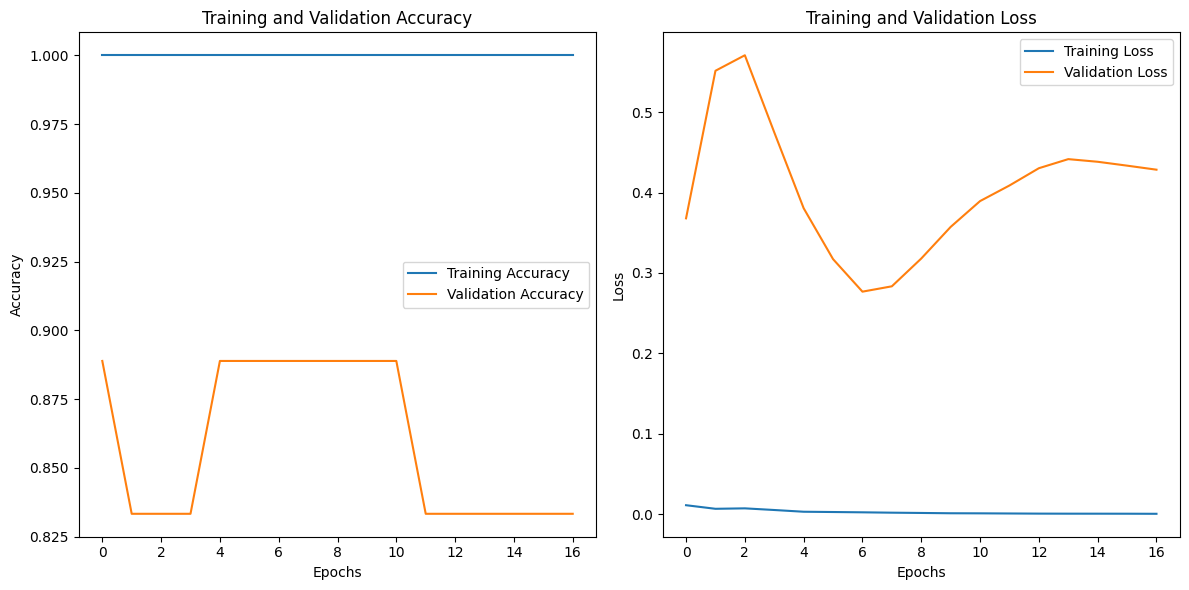

Model saved as 'dipendra_timalsina_model.h5'


In [10]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 1. Make Predictions on Test Data
test_images, test_labels = [], []  # Initialize empty lists to store test images and labels

# Iterate over the test dataset to get images and labels
for images, labels in test_ds:
    test_images.append(images)
    test_labels.append(labels)

# Convert lists to numpy arrays
test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

# Predict on the test dataset
predictions = model.predict(test_images)

# Convert probabilities to class labels using np.argmax
predicted_labels = np.argmax(predictions, axis=1)

# 2. Generate Classification Report
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

# 3. Visualization of Training and Validation Loss and Accuracy
# Assuming 'history' was assigned in the previous cell,
# if it's not, you need to ensure the fit process is called and assigned to 'history' before this cell is run
# like this:
# history = model.fit(
#     train_ds,  # Training dataset
#     validation_data=val_ds,  # Validation dataset
#     epochs=250,  # Number of epochs
#     batch_size=16,  # Batch size
#     callbacks=callbacks  # List of callbacks
# )

# Re-train the model to get the history
history = model.fit(
    train_ds,  # Training dataset
    validation_data=val_ds,  # Validation dataset
    epochs=250,  # Number of epochs
    batch_size=16,  # Batch size
    callbacks=callbacks  # List of callbacks
)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy') # Access the accuracy values from the history object using .history
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') # Access the validation accuracy values from the history object using .history
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss') # Access the loss values from the history object using .history
plt.plot(history.history['val_loss'], label='Validation Loss') # Access the validation loss values from the history object using .history
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# 4. Save the Model
model.save('dipendra_timalsina_model.h5')  # Save the trained model
print("Model saved as 'dipendra_timalsina_model.h5'")